## Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

## Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Importing the necessary libraries

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


We have 26 columns in the dataset from which we have to predict the price column which will act as our target variable and since our target variable is a continous variable we need to use regression to predict the target.

In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Since our dataset doesnot contain any null value we can skip the 'dealing with missing data' part

<AxesSubplot:>

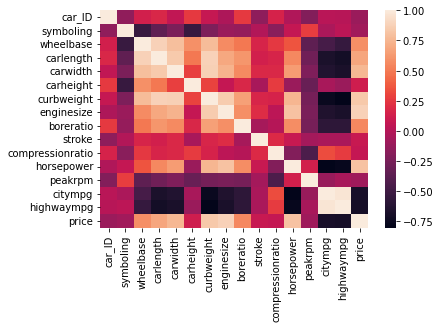

In [7]:
sns.heatmap(df.corr())

Now lets see how each variable affects the target price. Lets drop the car_ID column since it doesnot have any impact on our target and is used only for labeling purposes.

In [8]:
df.drop(['car_ID'],axis = 1).corr()['price'].sort_values()

highwaympg         -0.697599
citympg            -0.685751
peakrpm            -0.085267
symboling          -0.079978
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
boreratio           0.553173
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

We can see almost all the features some significant amount influence over our target 

<AxesSubplot:xlabel='price', ylabel='Density'>

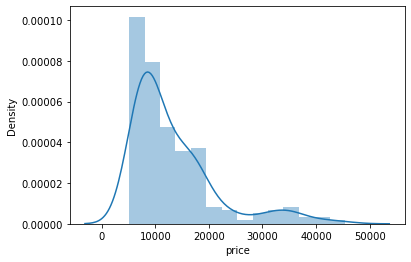

In [9]:
sns.distplot(df['price'])

We can see most of the prices are in between 5000 and 30000 dollars

Since engine size has a lot of influence over price, lets plot a graph to see how it affects price

<AxesSubplot:xlabel='enginesize', ylabel='price'>

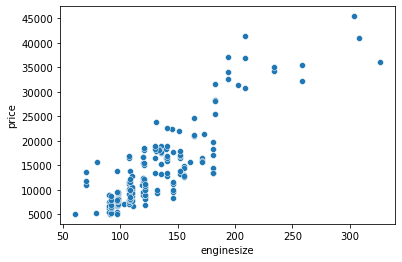

In [10]:
sns.scatterplot(x='enginesize',y='price',data = df)

you can see as the engine size increases the price increases. Since there is no scope for so much outliers we can keep the data the same way 

<AxesSubplot:xlabel='curbweight', ylabel='price'>

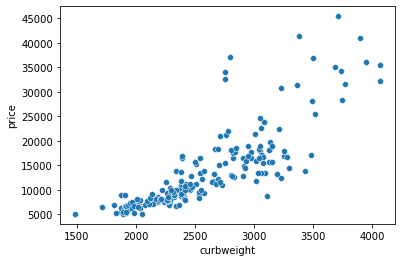

In [11]:
sns.scatterplot(x = 'curbweight',y = 'price',data = df)

Huh! Here when you see the graph at around 2800 curbweight there are few outliers which maybe wrong.Lets try to remove them from the data set

In [12]:
df[(df['curbweight']>2500)&(df['curbweight']<3000) & (df['price']>30000)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
126,127,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528.0
127,128,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028.0
128,129,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028.0


Now we can see three cars which have a curbweight between 2500 kg and 3000 kg but has a price greater then 30000 $ which doesnot follow the trend. For deeper insights we have to ask someone from the feild, but I am gonna just assume that it is unusual and remove those data from our dataset.

In [13]:
ind_drop = df[(df['curbweight']>2500)&(df['curbweight']<3000) & (df['price']>30000)].index

In [14]:
df = df.drop(ind_drop, axis = 0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            202 non-null    int64  
 1   symboling         202 non-null    int64  
 2   CarName           202 non-null    object 
 3   fueltype          202 non-null    object 
 4   aspiration        202 non-null    object 
 5   doornumber        202 non-null    object 
 6   carbody           202 non-null    object 
 7   drivewheel        202 non-null    object 
 8   enginelocation    202 non-null    object 
 9   wheelbase         202 non-null    float64
 10  carlength         202 non-null    float64
 11  carwidth          202 non-null    float64
 12  carheight         202 non-null    float64
 13  curbweight        202 non-null    int64  
 14  enginetype        202 non-null    object 
 15  cylindernumber    202 non-null    object 
 16  enginesize        202 non-null    int64  
 1

Now our dataset is reduced from 205 to 203.

<AxesSubplot:xlabel='horsepower', ylabel='price'>

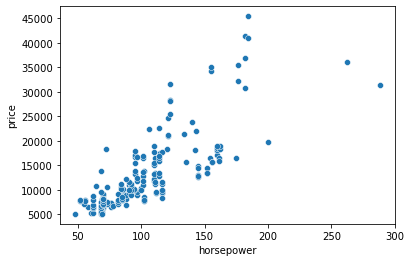

In [16]:
sns.scatterplot(x = 'horsepower',y = 'price',data = df)

If you see the graph, you can see three cars have horse powers between than 200 and 300 which is common only with higher models other base models offer 100 to 200 hp only. So let's check the car name for these three points 

In [17]:
car_hp = df[df['horsepower']>=200]

In [18]:
car_hp['CarName']

49           jaguar xk
105       nissan kicks
129    porsche cayenne
Name: CarName, dtype: object

So all these three cars are royal brands which can offer this range of horse power

The remaining features insignificant or hold less significance when it comes to factors that influence affecting the price of cars in American market.

**Now moving on to categorial features**

In [19]:
def split(x):
    return x.split(' ')[0]

In [20]:
df['Company Name'] = df['CarName'].apply(split)

In [21]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company Name
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [22]:
df['Company Name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

In [23]:
df['Company Name'] = df['Company Name'].replace(to_replace='maxda',value = 'mazda')
df['Company Name'] = df['Company Name'].replace(to_replace='porcshce',value = 'porsche')
df['Company Name'] = df['Company Name'].replace(to_replace='toyouta',value = 'toyata')
df['Company Name'] = df['Company Name'].replace(to_replace='vokswagen',value = 'volkswagen')
# vw is most probably volkswagen
df['Company Name'] = df['Company Name'].replace(to_replace='vw',value = 'volkswagen')

In [24]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company Name
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,audi
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,audi
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,audi
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,audi
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,audi
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi


## Feature Engineering

In [25]:
df.corr()['price'].sort_values()

highwaympg         -0.706581
citympg            -0.680736
peakrpm            -0.161643
symboling          -0.161333
car_ID             -0.133332
compressionratio    0.078727
stroke              0.132919
carheight           0.163690
boreratio           0.530737
wheelbase           0.688053
carlength           0.740932
horsepower          0.786418
carwidth            0.822139
curbweight          0.867271
enginesize          0.874166
price               1.000000
Name: price, dtype: float64

In [26]:
# Since citympg and highwaympg has a negative correlation with price lets use domain knowledge to combine both
df['fueleconomy'] = ((0.55 * df['citympg']) + (0.45 * df['highwaympg']))

In [27]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company Name,fueleconomy
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero,23.70
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero,23.70
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero,22.15
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.000,audi,26.70
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.000,audi,19.80
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.5,110,5500,19,25,15250.000,audi,21.70
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,3.19,3.40,8.5,110,5500,19,25,17710.000,audi,21.70
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,3.19,3.40,8.5,110,5500,19,25,18920.000,audi,21.70
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,3.13,3.40,8.3,140,5500,17,20,23875.000,audi,18.35
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,3.13,3.40,7.0,160,5500,16,22,17859.167,audi,18.70


**Since we are trying to predict the price for cars in American market, fueleconomy feature is more significant than citympg and highwaympg, which gives us an overall idea of mileage.**

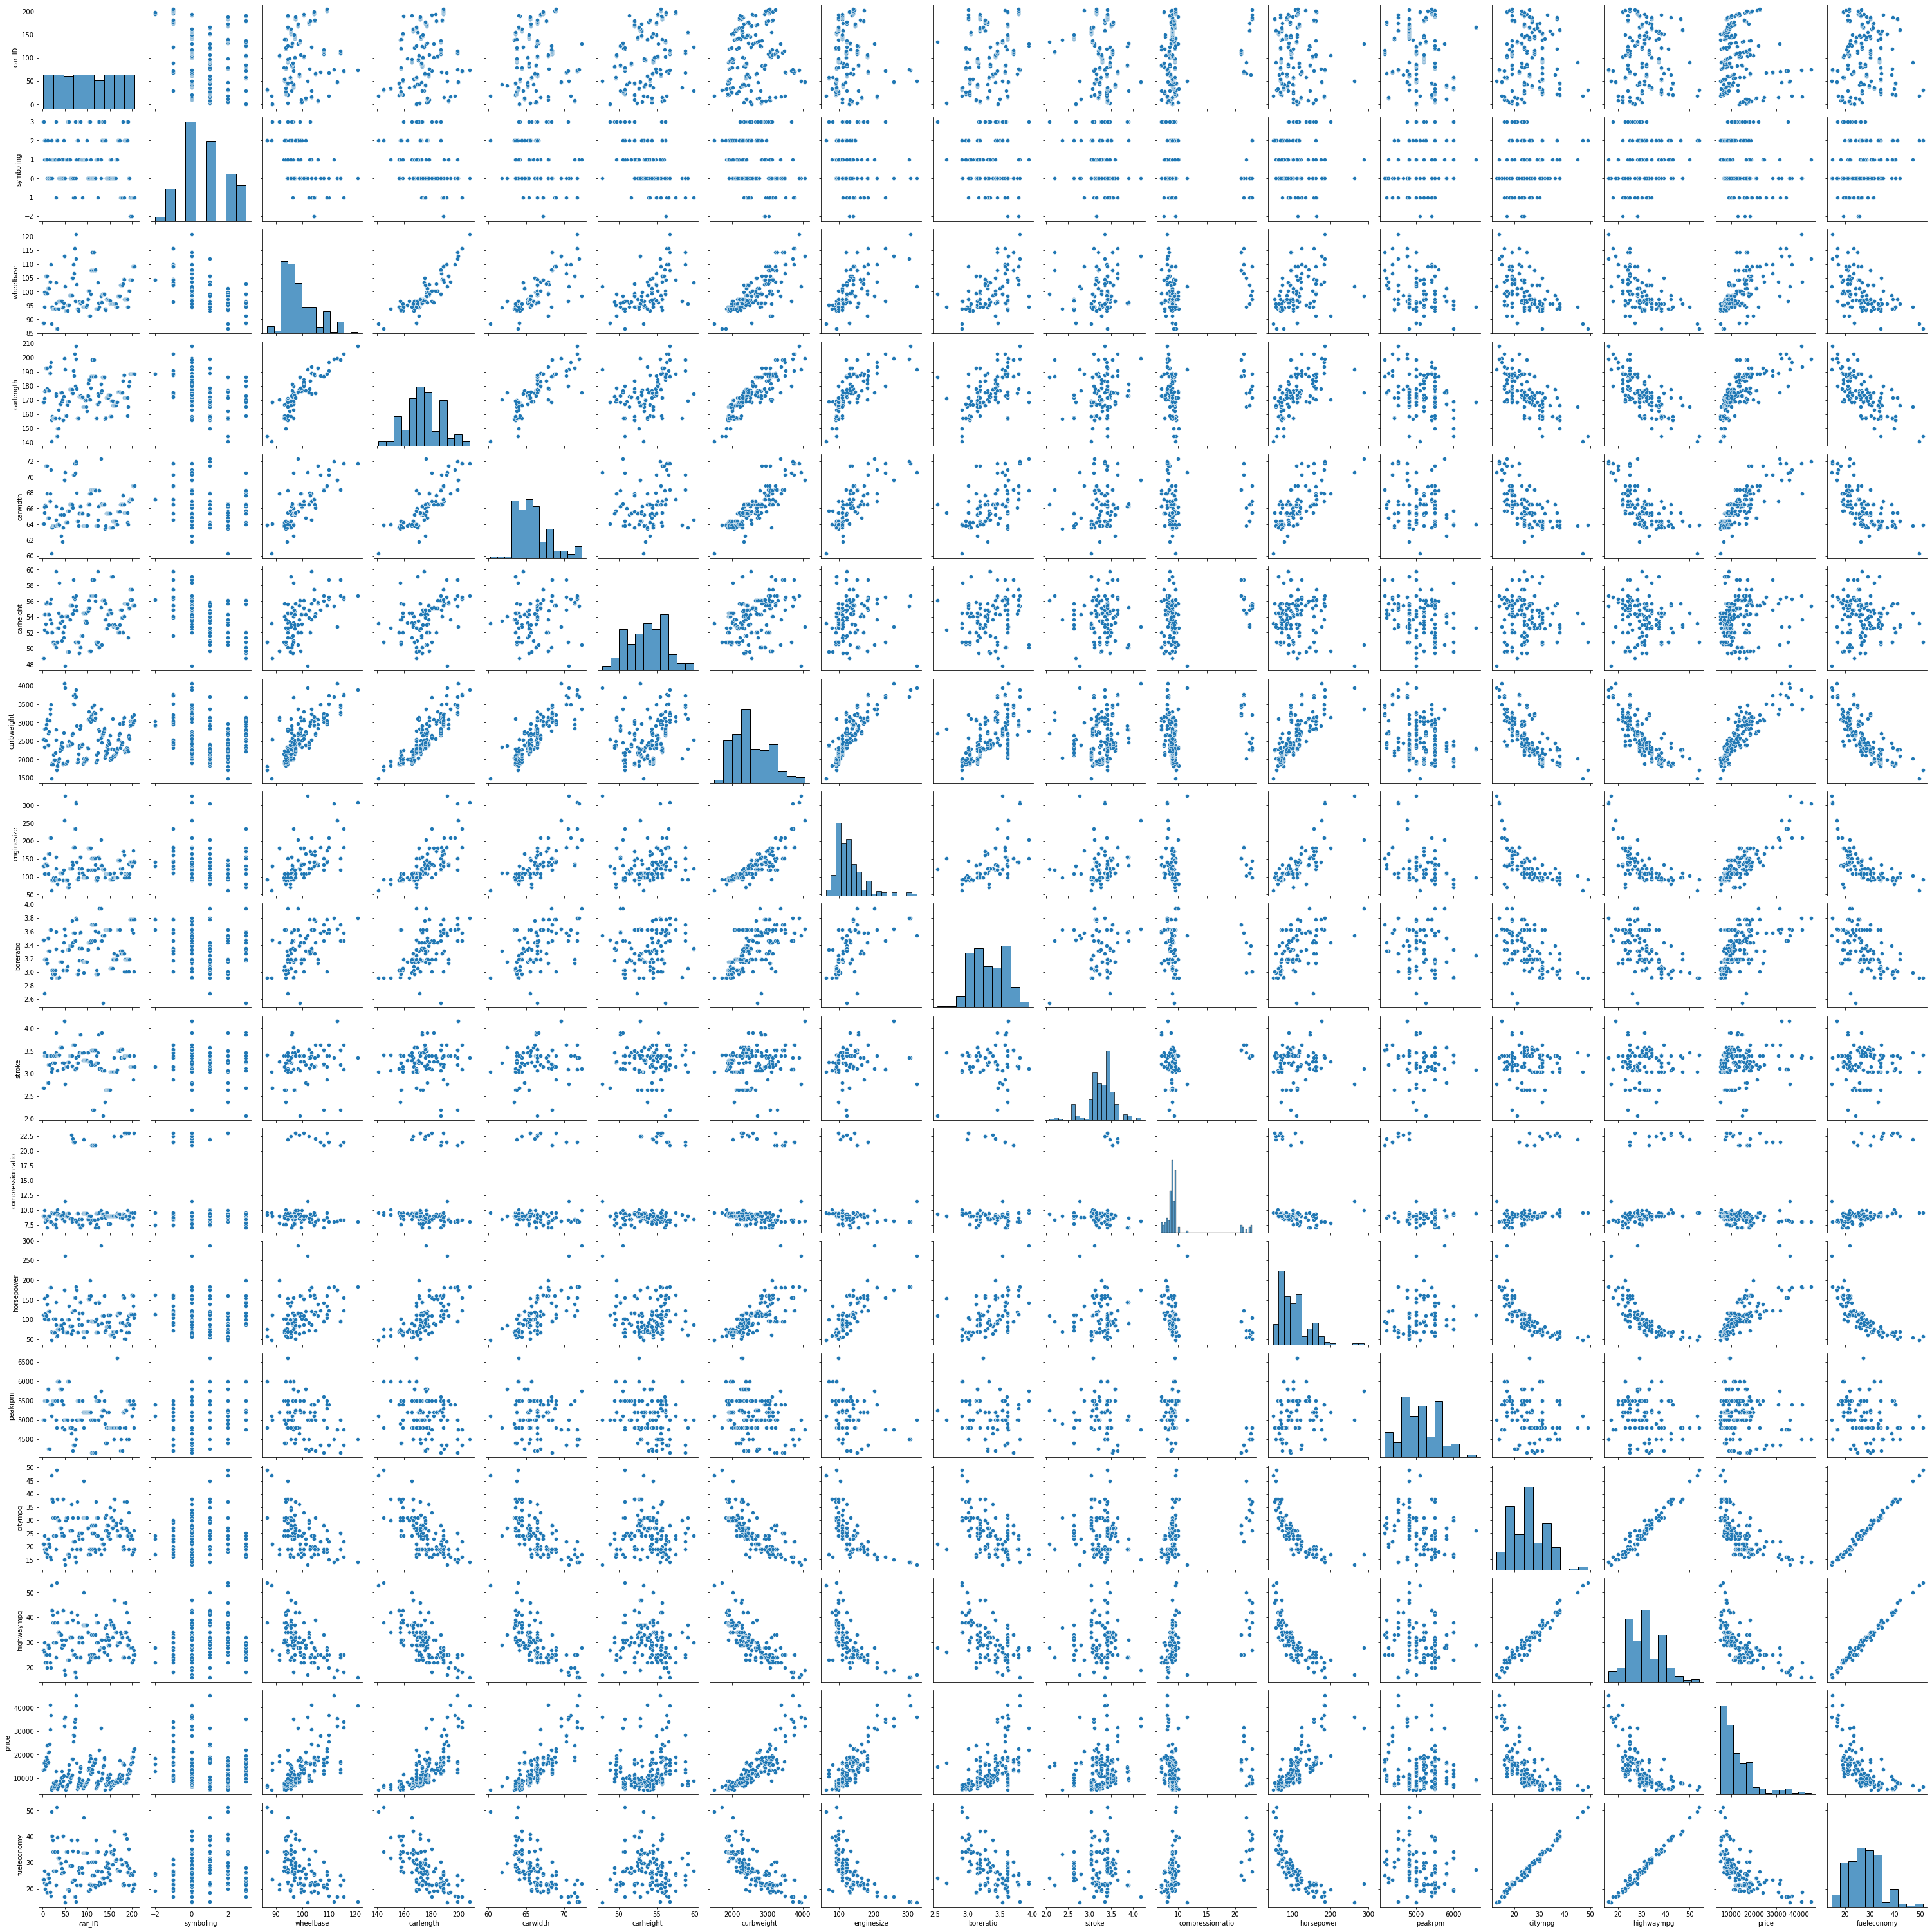

In [28]:
sns.pairplot(df)

In [45]:
df = df.drop(['car_ID','CarName'],axis = 1)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company Name,fueleconomy
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,23.70
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,23.70
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,22.15
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,26.70
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,19.80


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            202 non-null    int64  
 1   symboling         202 non-null    int64  
 2   CarName           202 non-null    object 
 3   fueltype          202 non-null    object 
 4   aspiration        202 non-null    object 
 5   doornumber        202 non-null    object 
 6   carbody           202 non-null    object 
 7   drivewheel        202 non-null    object 
 8   enginelocation    202 non-null    object 
 9   wheelbase         202 non-null    float64
 10  carlength         202 non-null    float64
 11  carwidth          202 non-null    float64
 12  carheight         202 non-null    float64
 13  curbweight        202 non-null    int64  
 14  enginetype        202 non-null    object 
 15  cylindernumber    202 non-null    object 
 16  enginesize        202 non-null    int64  
 1

## Creating dummy variables

In [46]:
dummy_list = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','Company Name','enginetype','cylindernumber']
temp = pd.get_dummies(df[dummy_list],drop_first = True)



## Splitting the data into features and Labels

In [47]:
temp.head()

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,Company Name_alfa-romero,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1,1,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0,1,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [48]:
df 

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company Name,fueleconomy
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,23.70
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,23.70
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,22.15
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,26.70
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,25.25
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,21.70
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,20.25
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,26.45


In [49]:
df = df.drop(dummy_list,axis = 1)

In [50]:
df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy
0,3,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70
1,3,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70
2,1,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15
3,2,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70
4,2,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,25.25
201,-1,109.1,188.8,68.8,55.5,3049,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,21.70
202,-1,109.1,188.8,68.9,55.5,3012,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,20.25
203,-1,109.1,188.8,68.9,55.5,3217,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,26.45


In [51]:
df = pd.concat([df,temp],axis = 1)

In [52]:
df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,...,0,0,0,0,0,1,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,...,0,0,0,0,0,1,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,...,0,0,1,0,0,0,1,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,...,1,0,0,0,0,1,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,mpfi,3.78,3.15,...,1,0,0,0,0,1,0,0,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,mpfi,3.78,3.15,...,1,0,0,0,0,1,0,0,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,mpfi,3.58,2.87,...,0,0,1,0,0,0,1,0,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,idi,3.01,3.40,...,1,0,0,0,0,0,1,0,0,0


In [54]:
df = df.drop('fuelsystem',axis = 1)

In [56]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,1,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,1,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,1,0,0,0,1,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,1,0,0,0,0,1,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,1,0,0,0,1,0,0,0,0,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 204
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   symboling                 202 non-null    int64  
 1   wheelbase                 202 non-null    float64
 2   carlength                 202 non-null    float64
 3   carwidth                  202 non-null    float64
 4   carheight                 202 non-null    float64
 5   curbweight                202 non-null    int64  
 6   enginesize                202 non-null    int64  
 7   boreratio                 202 non-null    float64
 8   stroke                    202 non-null    float64
 9   compressionratio          202 non-null    float64
 10  horsepower                202 non-null    int64  
 11  peakrpm                   202 non-null    int64  
 12  citympg                   202 non-null    int64  
 13  highwaympg                202 non-null    int64  
 14  price     

Now that our dataset is completly ready for the model

In [58]:
X = df.drop('price',axis = 1)

In [59]:
y = df['price']

Since this is a regression task and not a distance based task it is not necessary to apply feature scaling

## Train - Test- split

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.10, random_state = 101)

In [66]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [67]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [68]:
lr_model.score(X_test,y_test)

0.6248318410257813

**Use K Fold cross validation to measure accuracy of our LinearRegression model**

In [69]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state =0)

cross_val_score(lr_model,X_train,y_train,cv = cv)


array([0.61216872, 0.95430437, 0.88659154, 0.91216778, 0.74644567])

**Find best model using GridSearchCV**

In [70]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.896945,{'normalize': False}
1,lasso,0.901093,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.891218,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


**We can see that lasso regression is the best model with best score of 0.90 with paramters alpha = 1 and selection = 'cyclic'**

**Finalizing the model**

In [71]:
from sklearn.linear_model import Lasso

In [72]:
lasso_cv_model = Lasso(alpha = 1, selection = 'cyclic')

In [73]:
lasso_cv_model.fit(X_train,y_train)

Lasso(alpha=1)

In [103]:
lasso_cv_model.score(X,y)

0.9584156478289456

## Model Deployment

In [104]:
import pickle
with open('car_price_prediction.pickle','wb') as f:
    pickle.dump(lasso_cv_model,f)

In [105]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))